In [1]:
!pip install plotly -q
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
pio.renderers.default = "iframe_connected"

In [2]:
df = pd.read_csv('/home/jovyan/FullStack/Projects/1_speed_dating/speed_dating_data.csv',encoding = 'ISO-8859-1')

In [3]:
pd.options.display.max_columns = None
display(df.head(300))

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [4]:
df.shape

(8378, 195)

In [5]:
#Let's clean the like column to have only scores between 1 and 10

list_of_clean_scores = [1,2,3,4,5,6,7,8,9,10]
df_clean_scores = df[df["like"].isin(list_of_clean_scores)
                     & df["attr"].isin(list_of_clean_scores)
                     & df["sinc"].isin(list_of_clean_scores)
                     & df["intel"].isin(list_of_clean_scores)
                     & df["fun"].isin(list_of_clean_scores)
                     & df["amb"].isin(list_of_clean_scores)
                     & df["shar"].isin(list_of_clean_scores)
                    ]


In [6]:
#To have explicit value of the gender
df_clean_scores["gender"] = df_clean_scores["gender"].apply(lambda x: "Male" if x == 1 else "Female" )

<ipython-input-6-a4fa2ca54fb8>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Question 1 = Which attributes are male and female sensitive to ? Are there differences ? Are there correlations between atttributes ?

In [7]:
fig = px.scatter(df_clean_scores, x="attr", y="like", trendline="ols",marginal_x="histogram", marginal_y="histogram", width=600, height=400, color="gender", title = "Corrélation appréciation VS attirant", labels={
                     "attr": "Est-il/elle attirant(e) ?",
                     "like": "Appréciation"
                 })
fig.show()

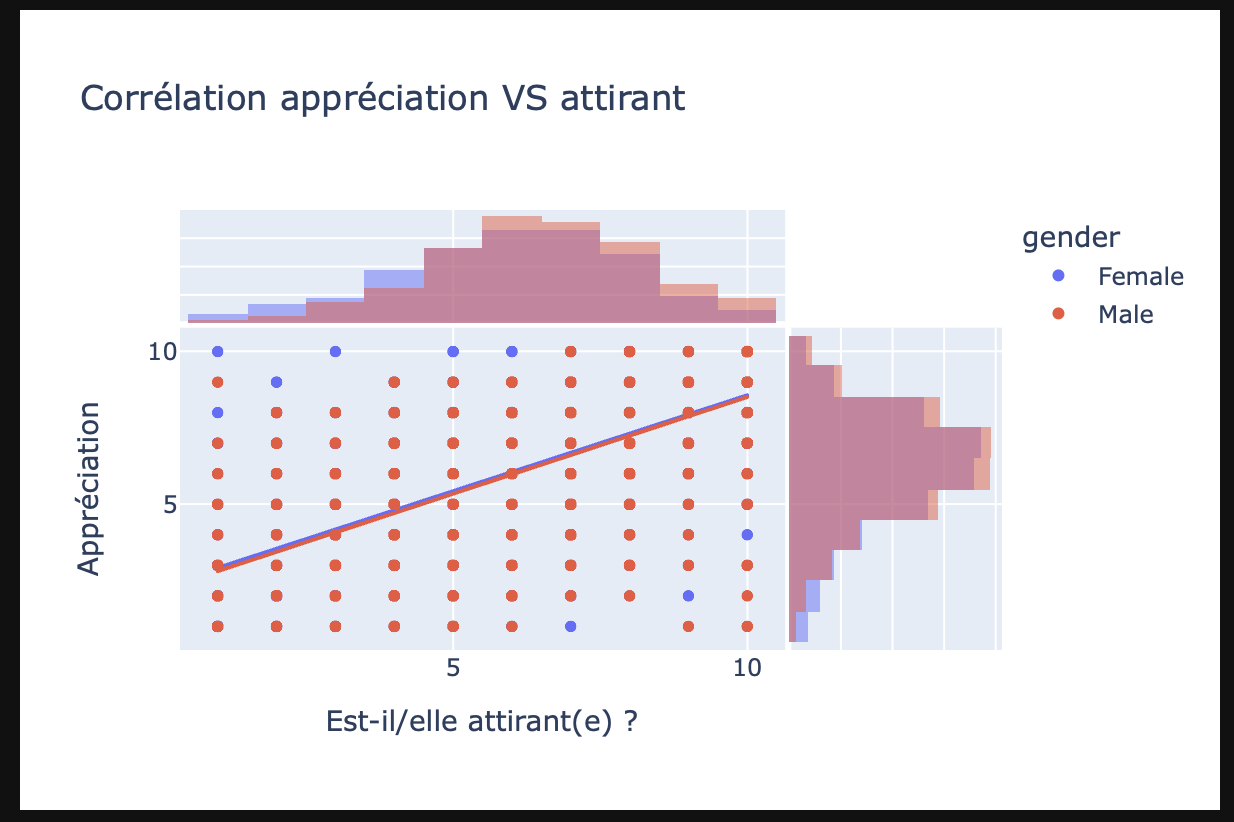

In [34]:
from IPython.display import display, Image
display(Image(filename='img/like_vs_attractive.png',  width = 600, height = 300))

In [8]:
fig = px.scatter(df_clean_scores, x="sinc", y="like", trendline="ols",marginal_x="histogram", marginal_y="histogram", width=600, height=400, color="gender", title = "Corrélation appréciation VS sincérité", labels={
                     "sinc": "Est-il/elle sincère ?",
                     "like": "Appréciation"
                 })
fig.show()

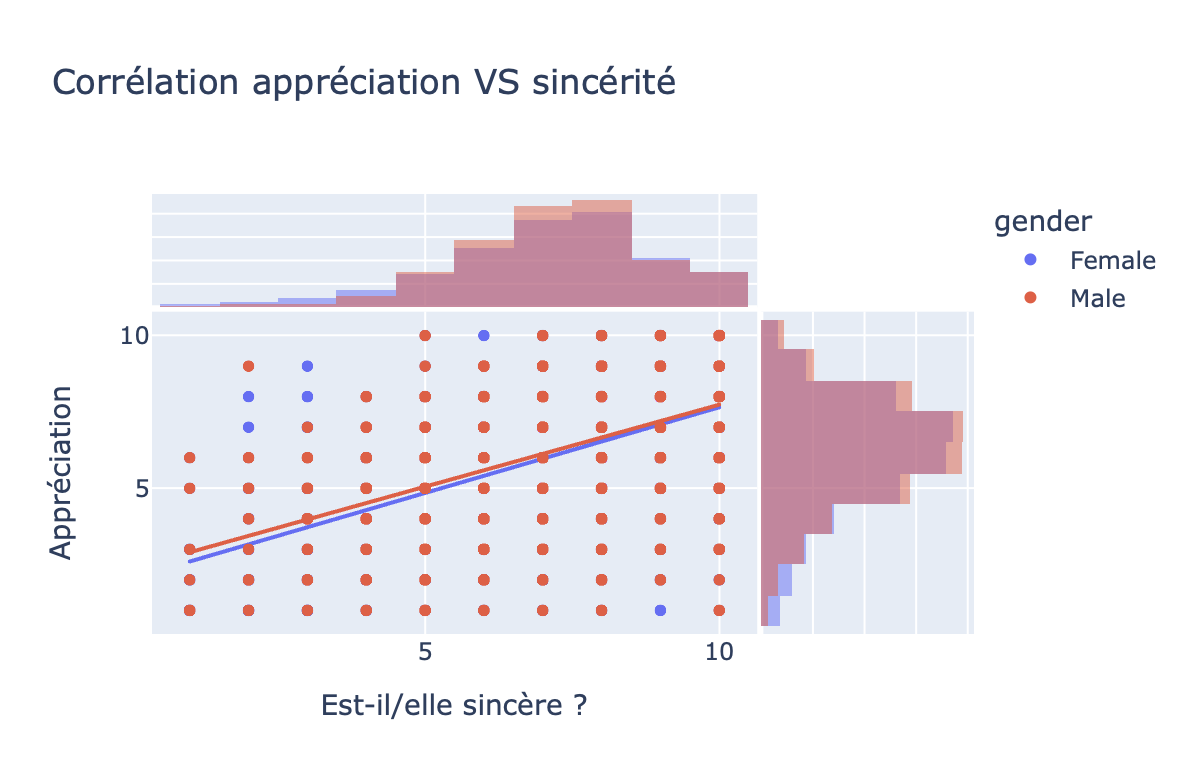

In [35]:
display(Image(filename='img/like_vs_sincere.png',  width = 600, height = 300))

In [9]:
fig = px.scatter(df_clean_scores, x="intel", y="like", trendline="ols",marginal_x="histogram", marginal_y="histogram", width=600, height=400, color="gender", title = "Corrélation appréciation VS intelligence", labels={
                     "intel": "Est-il/elle intelligent(e) ?",
                     "like": "Appréciation"
                 })
fig.show()

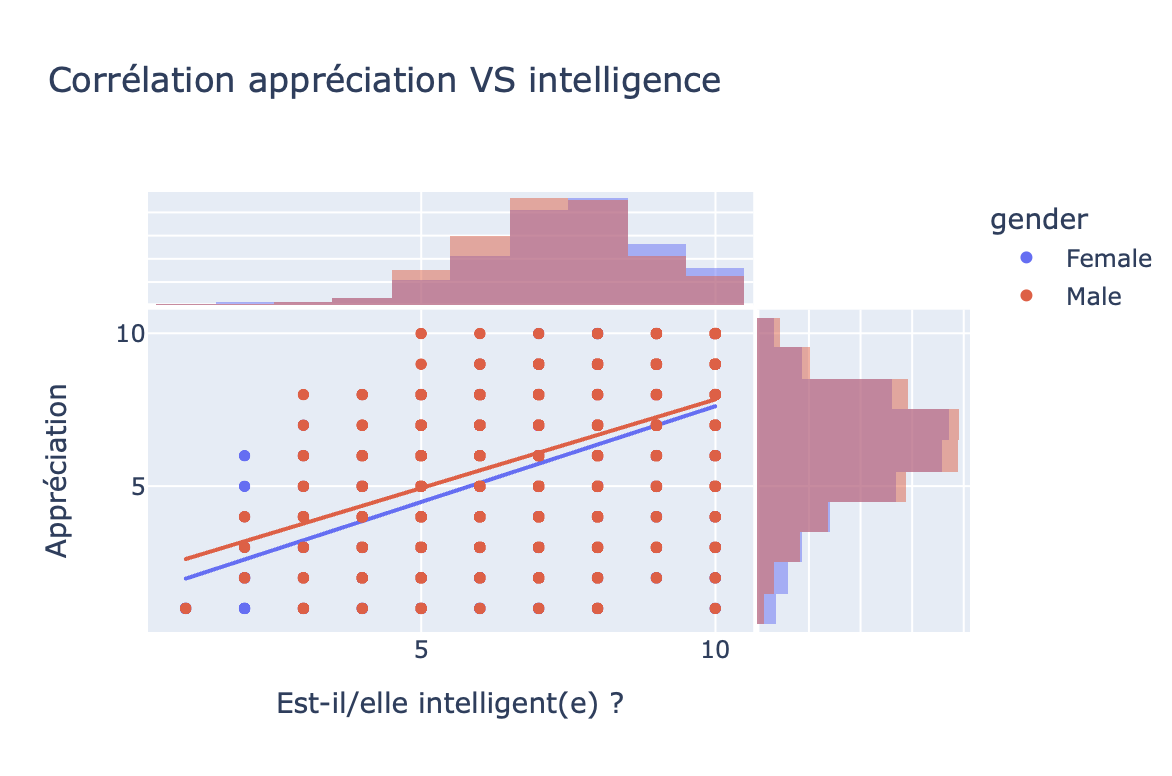

In [36]:
display(Image(filename='img/like_vs_intelligent.png',  width = 600, height = 300))

In [10]:
fig = px.scatter(df_clean_scores, x="fun", y="like", trendline="ols",marginal_x="histogram", marginal_y="histogram", width=600, height=400, color="gender", title = "Corrélation appréciation VS fun", labels={
                     "fun": "Est-il/elle drôle ?",
                     "like": "Appréciation"
                 })
fig.show()

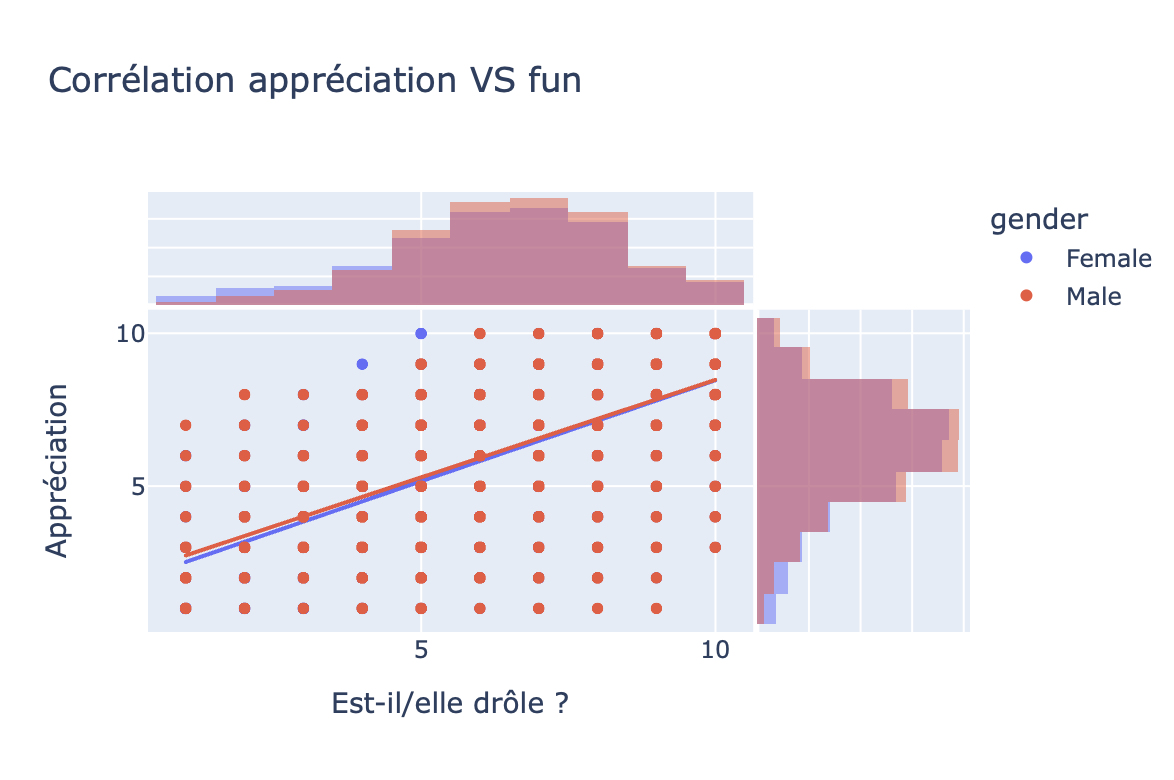

In [37]:
display(Image(filename='img/like_vs_fun.png',  width = 600, height = 300))

In [11]:
fig = px.scatter(df_clean_scores, x="amb", y="like", trendline="ols",marginal_x="histogram", marginal_y="histogram", width=600, height=400, color="gender", title = "Corrélation appréciation VS ambition personnelle", labels={
                     "amb": "Est-il/elle ambitieux/se ?",
                     "like": "Appréciation"
                 })
fig.show()

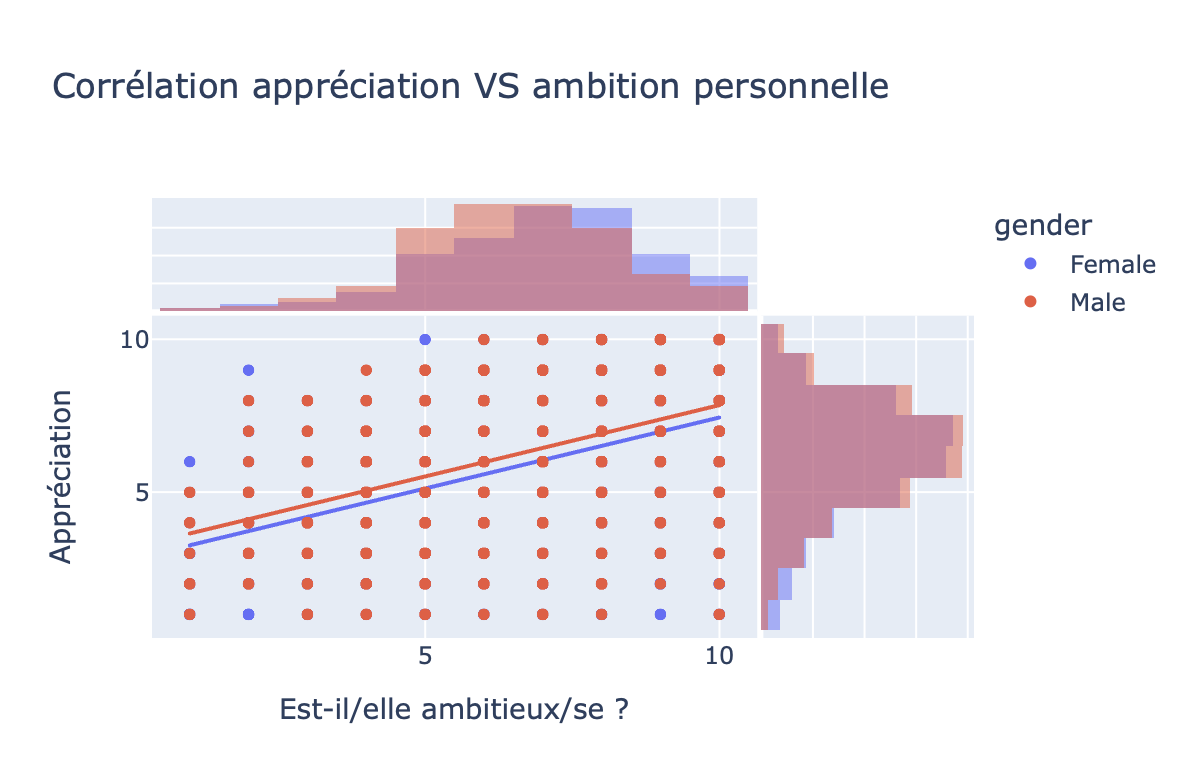

In [38]:
display(Image(filename='img/like_vs_ambition.png',  width = 600, height = 300))

In [12]:
fig = px.scatter(df_clean_scores, x="shar", y="like", trendline="ols",marginal_x="histogram", marginal_y="histogram", width=600, height=400, color="gender", title = "Corrélation appréciation VS centres d'intérêt communs", labels={
                     "shar": "Avons-nous des centres d'intérêt communs ?",
                     "like": "Appréciation"
                 })
fig.show()

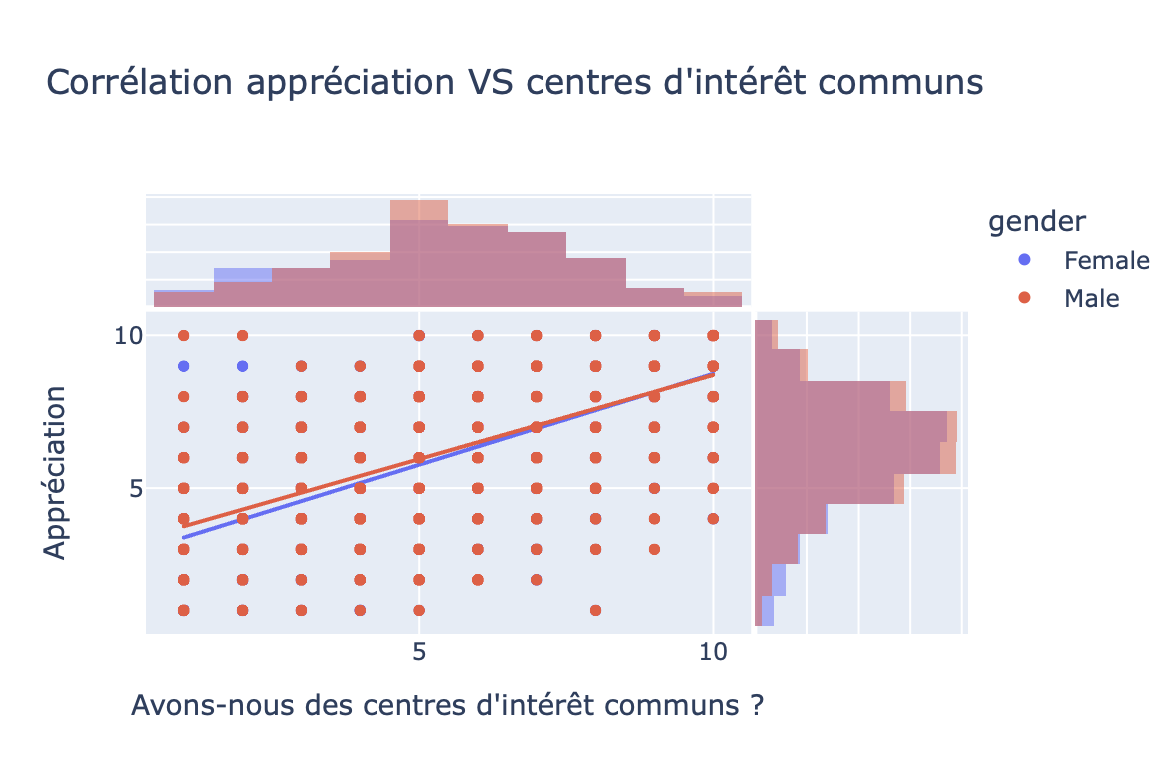

In [39]:
display(Image(filename='img/like_vs_interests.png',  width = 600, height = 300))

<AxesSubplot:>

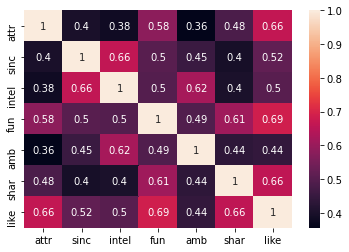

In [13]:
#Heatmap of attributes correlation

attributs_selection = df_clean_scores[["attr", "sinc", "intel", "fun", "amb", "shar", "like" ]]
corr = attributs_selection.corr()
sns.heatmap(corr,annot=True)

In [14]:
corr["like"].sort_values(ascending = False)

like     1.000000
fun      0.687137
attr     0.663514
shar     0.659538
sinc     0.517666
intel    0.502778
amb      0.442431
Name: like, dtype: float64

<i>Conclusion : There is a strong correlation between each attribute of the person met during the meeting and the global appreciation. We can see that fun, attractiveness and shared Interests/Hobbies are the most important attributes. We see so significative difference between the two genders.</i>

### Question 2 : How important is the cultural background depending on the race and sex ?

In [15]:
df_clean_scores["cultural_backgr_imp"] = df_clean_scores[["imprace", "imprelig"]].mean(axis=1)

<ipython-input-15-5f4d3ea8fc00>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
df_clean_scores["cultural_backgr_imp"]

0       3.0
1       3.0
2       3.0
3       3.0
4       3.0
       ... 
8367    1.0
8368    1.0
8369    1.0
8370    1.0
8377    1.0
Name: cultural_backgr_imp, Length: 6893, dtype: float64

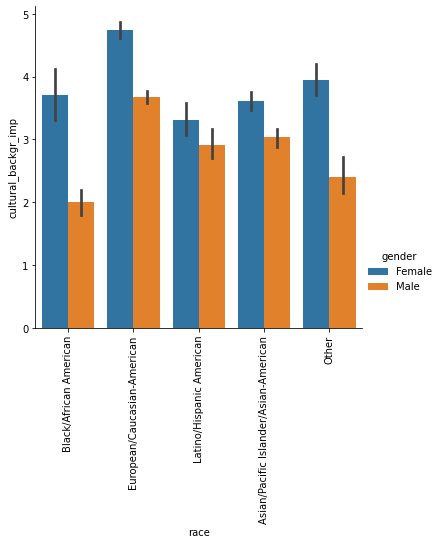

In [17]:
g = sns.catplot(
    data=df_clean_scores, kind="bar",
    x="race", y="cultural_backgr_imp", hue="gender"
)
g.set_xticklabels(["Black/African American",
                   "European/Caucasian-American",
                   "Latino/Hispanic American",
                   "Asian/Pacific Islander/Asian-American",
                   "Other"])
g.set_xticklabels(rotation=90)

<i>Conclusion :  The cultural background is significantly important depending the race, especially for women</i>

### Question 3 : does dating often has an impact on the ability to be seduced ? 

In [18]:
df_date_frequency = df_clean_scores.groupby(["iid", "gender"], as_index=False)["date", "like"].mean()

<ipython-input-18-961de4912332>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [19]:
df_date_frequency.head()

,iid,gender,date,like
0,1,Female,7.0,6.5
1,2,Female,5.0,6.6
2,3,Female,3.0,8.2
3,4,Female,5.0,6.6
4,5,Female,4.0,7.2


In [20]:
df_date_frequency.shape

(536, 4)

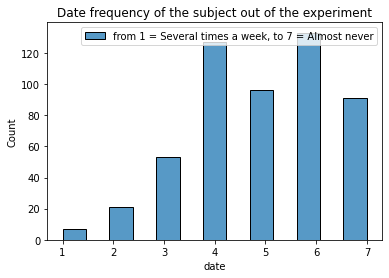

In [21]:
f = sns.histplot(df_date_frequency, x="date")
f.set_title('Date frequency of the subject out of the experiment')
plt.legend(labels=["from 1 = Several times a week, to 7 = Almost never"])

In [22]:
df_date_frequency_significant = df_date_frequency[df_date_frequency["date"] > 2]

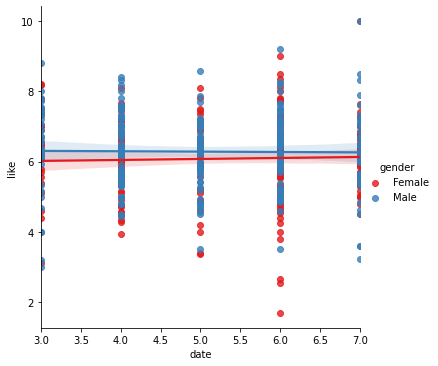

In [23]:
x = sns.lmplot(x="date", y="like", hue="gender", data=df_date_frequency_significant,palette="Set1")

<i>Conclusion : No matter how often the subject has dates outside of the experiment, it has no impact on their ability to be seduced in the frame of the experiment.</i>

### Question 4 : which category of student is more inclined to be seduced ?

In [24]:
df_field_of_study  = df_clean_scores.groupby(["iid", "field_cd"], as_index=False)["like"].mean()

In [25]:
df_field_of_study.head()

,iid,field_cd,like
0,1,1.0,6.5
1,2,1.0,6.6
2,3,2.0,8.2
3,4,1.0,6.6
4,5,1.0,7.2


In [26]:
# Study field codification

"""1= Law  
2= Math
3= Social Science, Psychologist 
4= Medical Science, Pharmaceuticals, and Bio Tech 
5= Engineering  
6= English/Creative Writing/ Journalism 
7= History/Religion/Philosophy 
8= Business/Econ/Finance 
9= Education, Academia 
10= Biological Sciences/Chemistry/Physics
11= Social Work 
12= Undergrad/undecided 
13=Political Science/International Affairs 
14=Film
15=Fine Arts/Arts Administration
16=Languages
17=Architecture
18=Other"""

'1= Law  \n2= Math\n3= Social Science, Psychologist \n4= Medical Science, Pharmaceuticals, and Bio Tech \n5= Engineering  \n6= English/Creative Writing/ Journalism \n7= History/Religion/Philosophy \n8= Business/Econ/Finance \n9= Education, Academia \n10= Biological Sciences/Chemistry/Physics\n11= Social Work \n12= Undergrad/undecided \n13=Political Science/International Affairs \n14=Film\n15=Fine Arts/Arts Administration\n16=Languages\n17=Architecture\n18=Other'

In [27]:
#Here we are going to create macro-groups of study fields : scientific,
#social&Human sciences, law&Politics, business, art, and others
df_field_of_study['field_cd'] = df_field_of_study['field_cd'].apply(lambda x :
                                                                    "Law&Politics" if x == 1  else
                                                                    "Scientific" if x == 2  else
                                                                    "Social&Human sciences" if x == 3  else
                                                                    "Scientific" if x == 4  else
                                                                    "Scientific" if x == 5  else
                                                                    "Law&Politics" if x == 6  else
                                                                    "Social&Human sciences" if x == 7  else
                                                                    "Business" if x == 8  else
                                                                    "Social&Human sciences" if x == 9  else
                                                                    "Scientific" if x == 10  else
                                                                    "Social&Human sciences" if x == 11  else
                                                                    "Law&Politics" if x == 13  else
                                                                    "Art" if x == 14  else
                                                                    "Art" if x == 15  else
                                                                    "Art" if x == 16  else
                                                                    "Art" if x == 17  else
                                                                    "Others")

In [28]:
df_field_of_study.head()

,iid,field_cd,like
0,1,Law&Politics,6.5
1,2,Law&Politics,6.6
2,3,Scientific,8.2
3,4,Law&Politics,6.6
4,5,Law&Politics,7.2


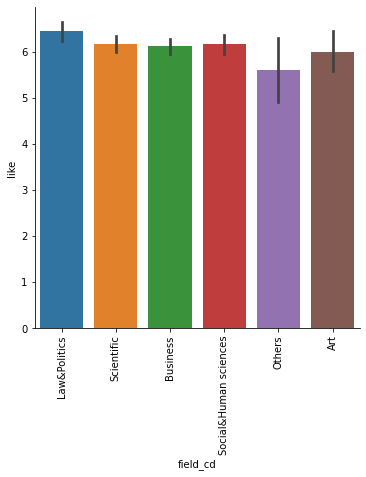

In [29]:
a = sns.catplot(
    data=df_field_of_study, kind="bar",
    x="field_cd", y="like"
)
a.set_xticklabels(rotation=90)

<i>Conclusion : the type of studies has no significant impact on the ability to be seduced by the person met in the context of the experience.</i>